In [1]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import mglearn

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 

In [6]:
iris=sns.load_dataset('iris')
X_iris=iris.drop('species',axis=1)
y_iris=iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


### 실습 
* PCA를 이용해서 주성분 2개를 뽑고 그에 대한 2개롤 몇%를 설명할 수 있는지
### 추가실습 : 그래프 그려보기
* 주성분 1은 어떤 변수를 가장 많이 사용하고 있는지
* 주성분 2는 어떤 변수를 가장 많이 사용하고 있는지


In [9]:
# 데이터의 주성분을 두개로
pca = PCA(n_components=2)
# iris 데이터로 PCA 모델을 생성
pca.fit(X_iris)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_iris)
print("원본 데이터 형태: {}".format(str(X_iris.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (150, 4)
축소된 데이터 형태: (150, 2)


In [10]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [11]:
import numpy as np 
np.sum(pca.explained_variance_ratio_)

0.977685206318795

In [18]:
X_iris[:2]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [19]:
### 주성분 1, 2는 어떤 변수를 많이 사용하는가?
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


* 주성분 1 : petal_length, 주성분 2 : sepal

In [20]:
# MinMaxScaler를 이용해 전처리 후 PCA 실행
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_iris)
X_scaled_mM=scaler.transform(X_iris)

pca=PCA(n_components=2)
pca.fit(X_scaled_mM)

# 변환 
X_pca=pca.transform(X_scaled_mM)
print(pca.explained_variance_ratio_)

[0.84136038 0.11751808]


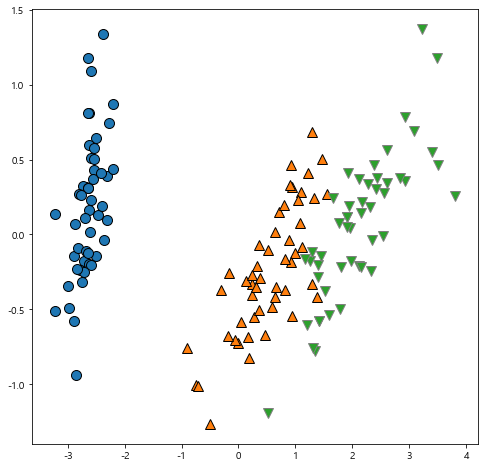

In [16]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris.species)